In [1]:
!conda env list

# conda environments:
#
base                  *  C:\Users\vkvic\anaconda3



In [1]:
!conda activate base

In [2]:
pip install pymongo

   ---------------------------------------- 0.0/631.0 kB ? eta -:--:--
    --------------------------------------- 10.2/631.0 kB ? eta -:--:--
   -- ------------------------------------ 41.0/631.0 kB 495.5 kB/s eta 0:00:02
   --------- ------------------------------ 143.4/631.0 kB 1.2 MB/s eta 0:00:01
   ---------------- ----------------------- 266.2/631.0 kB 1.5 MB/s eta 0:00:01
   ------------------- -------------------- 307.2/631.0 kB 1.6 MB/s eta 0:00:01
   ---------------------------- ----------- 450.6/631.0 kB 1.8 MB/s eta 0:00:01
   -------------------------------------- - 614.4/631.0 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 631.0/631.0 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/307.7 kB ? eta -:--:--
   -------------------------- ------------- 204.8/307.7 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------  307.2/307.7 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 307.7/307.7 kB 3.2 MB/

In [ ]:
#ingesting data to mongodb database named 'btdataset'
# from pymongo import MongoClient
# import gridfs
# import os

# # Connect to MongoDB
# client = MongoClient('localhost', 27017)
# db = client['btdataset']


# image_folder = r"C:\dataset\dataset3\All_images"

# # Iterate through files in the folder and insert them into MongoDB
# for filename in os.listdir(image_folder):
#     with open(os.path.join(image_folder, filename), 'rb') as f:
#         image_data = f.read()
#         db.img3.insert_one({'filename': filename, 'image': image_data})


# image_folder = r"C:\dataset\datasetno\no_tumor"
# # Iterate through files in the folder and insert them into MongoDB
# for filename in os.listdir(image_folder):
#     with open(os.path.join(image_folder, filename), 'rb') as f:
#         image_data = f.read()
#         db.imgno.insert_one({'filename': filename, 'image': image_data})

# print("Images uploaded successfully.")


In [ ]:
#downloading data to our workspace
# from pymongo import MongoClient
# import gridfs


# image_folder = './input/dataset3/All_images'

# # Retrieve images from MongoDB
# images_collection = db.img3.find()

# # Save images to local folder
# for image in images_collection:
#     filename = image['filename']
#     with open(os.path.join(image_folder, filename), 'wb') as f:
#         f.write(image['image'])



# image_folder = './input/datasetno/no_tumor'
# # Retrieve images from MongoDB
# images_collection = db.imgno.find()

# # Save images to local folder
# for image in images_collection:
#     filename = image['filename']
#     with open(os.path.join(image_folder, filename), 'wb') as f:
#         f.write(image['image'])

# print("Images downloaded successfully.")


In [6]:
import os

os.makedirs("input/dataset3/All_images", exist_ok=True)
os.makedirs("input/datasetno/no_tumor", exist_ok=True)


In [10]:
%pip install imutils
%pip install opencv-python
%pip install tensorflow
import imutils

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
# !pip install imutils       # A series of functions to make basic image processing operation such as rotation,resizing etc
import numpy as np 
from tqdm import tqdm      #tqdm is used for progress bar
import cv2                 #cv2 is an openCV library    
import os                  # OS is used to interact with the operating system(Example:File system)
import shutil              #It is used for copy,create and remote operation on file.
import itertools           #It is used for memory efficient and precise code of iterating objects in code
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123

In [12]:
import os
from scipy.io import loadmat
import h5py
import numpy as np
from PIL import Image
import cv2


# Creating Directories to store images  into folders

# Create directories for training
os.makedirs("output/dataset_classified_for_training/meningioma")
os.makedirs("output/dataset_classified_for_training/glioma")
os.makedirs("output/dataset_classified_for_training/pituitary" )
os.makedirs("output/dataset_classified_for_training/no_tumor" )

# Create directories for validation
os.makedirs("output/dataset_classified_for_validation/meningioma")
os.makedirs("output/dataset_classified_for_validation/glioma")
os.makedirs("output/dataset_classified_for_validation/pituitary")
os.makedirs("output/dataset_classified_for_validation/no_tumor")

# Create directories for testing
os.makedirs("output/dataset_classified_for_testing/meningioma")
os.makedirs("output/dataset_classified_for_testing/glioma")
os.makedirs("output/dataset_classified_for_testing/pituitary")
os.makedirs("output/dataset_classified_for_testing/no_tumor")

print("Directories created successfully.")


Directories created successfully.


In [13]:
#Dataset Path
IMG_PATH = r'./input/dataset3/All_images'
        
total_files = 0
type_one = 0
type_two = 0
type_three = 0
type_four = 0

for img_name in os.listdir(IMG_PATH):
    h5_file = h5py.File(f'{IMG_PATH}/{img_name}', 'r') #formatted string literal f', OPENING MAT FILE FOR READING
    cjdata = h5_file['cjdata']                         # CJDATA is a MATLAB struct , a type of matrix 
    image = np.array(cjdata.get('image')).astype(np.float64)
    label = cjdata.get('label')[0,0]
   
    
    #Dividing label 1 into training (80%) ,validation (10%) and testing(10%)
    
    if label == 1.0:
        type_one += 1       # To read number of type 1 images
        if type_one % 10 <= 6:
            png = f'./output/dataset_classified_for_training/meningioma/{img_name}'[:-3]+"png"
        elif type_one % 10 <= 8 and type_one % 10 >= 7:
            png = f'./output/dataset_classified_for_validation/meningioma/{img_name}'[:-3]+"png"
        elif type_one % 10 <= 9:
            png = f'./output/dataset_classified_for_testing/meningioma/{img_name}'[:-3]+"png"
            
    #Dividing label 2 into training (80%) ,validation (10%) and testing(10%)       
            
    elif label == 2.0:
        type_two += 1      # To read number of type 2 images
        if type_two % 10 <= 6:
            png = f'./output/dataset_classified_for_training/glioma/{img_name}'[:-3]+"png"
        elif type_two % 10 <= 8 and type_two % 10 >= 7:
            png = f'./output/dataset_classified_for_validation/glioma/{img_name}'[:-3]+"png"
        elif type_two % 10 <= 9:
            png = f'./output/dataset_classified_for_testing/glioma/{img_name}'[:-3]+"png"
        
    #Dividing label 3 into training (80%) ,validation (10%) and testing(10%)   
        
    elif label == 3.0:
        type_three += 1    # To read number of type 3 images
        if type_three % 10 <= 6:
            png = f'./output/dataset_classified_for_training/pituitary/{img_name}'[:-3]+"png"
        elif type_three % 10 <= 8 and type_three % 10 >= 7:
            png = f'./output/dataset_classified_for_validation/pituitary/{img_name}'[:-3]+"png"
        elif type_three % 10 <= 9:
            png = f'./output/dataset_classified_for_testing/pituitary/{img_name}'[:-3]+"png"
       
    #Dividing label 4 into training (80%) ,validation (10%) and testing(10%)
        
    else:
        type_four += 1     # To read number of type 4 images
        if type_four % 10 <= 6:
            png = f'./output/dataset_classified_for_training/no_tomor/{img_name}'[:-3]+"png"
        elif type_four % 10 <= 8 and type_four % 10 >= 7:
            png = f'./output/dataset_classified_for_validation/no_tomor/{img_name}'[:-3]+"png"
        elif type_four % 10 <= 9:
            png = f'./output/dataset_classified_for_testing/no_tomor/{img_name}'[:-3]+"png"
        
    #Keys within 'cjdata': ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
    tumorBorder = np.array(cjdata.get('tumorBorder'))[0]
    tumorMask = np.array(cjdata.get('tumorMask'))
    h5_file.close()
    hi = np.max(image)
    lo = np.min(image)
    image = (((image - lo)/(hi-lo))*255).astype(np.uint8)
    im = Image.fromarray(image)
    im.save(png)
    total_files += 1
    print("saving", png, "File No: ", total_files, "type:", label)
    
print("Finished converting all files: ", total_files)
print("Total type four images :",type_four)  #new changes

saving ./output/dataset_classified_for_training/meningioma/1.png File No:  1 type: 1.0
saving ./output/dataset_classified_for_training/meningioma/10.png File No:  2 type: 1.0
saving ./output/dataset_classified_for_training/meningioma/100.png File No:  3 type: 1.0
saving ./output/dataset_classified_for_training/pituitary/1000.png File No:  4 type: 3.0
saving ./output/dataset_classified_for_training/pituitary/1001.png File No:  5 type: 3.0
saving ./output/dataset_classified_for_training/pituitary/1002.png File No:  6 type: 3.0
saving ./output/dataset_classified_for_training/pituitary/1003.png File No:  7 type: 3.0
saving ./output/dataset_classified_for_training/pituitary/1004.png File No:  8 type: 3.0
saving ./output/dataset_classified_for_training/pituitary/1005.png File No:  9 type: 3.0
saving ./output/dataset_classified_for_validation/pituitary/1006.png File No:  10 type: 3.0
saving ./output/dataset_classified_for_validation/pituitary/1007.png File No:  11 type: 3.0
saving ./output/da

In [14]:
#Dividing the no tumor into training ,validation and testing 

no_tumor_image_path = './input/datasetno/no_tumor'
for img_name in os.listdir(no_tumor_image_path):
    type_four += 1
    if type_four % 10 <= 6:
        jpg = f'output/dataset_classified_for_training/no_tumor/{img_name}'
    elif type_four % 10 <= 8 and type_four % 10 >= 7:
        jpg = f'output/dataset_classified_for_validation/no_tumor/{img_name}'
    elif type_four % 10 <= 9:
        jpg = f'output/dataset_classified_for_testing/no_tumor/{img_name}'
    shutil.copy(no_tumor_image_path+'/'+img_name, jpg)
    total_files += 1
    print("saving", jpg, "File No: ", total_files, "type:", label)
print("Finished converting all type 4 files: ", type_four)
print("total files: ", total_files)

saving output/dataset_classified_for_training/no_tumor/1.jpg File No:  3065 type: 3.0
saving output/dataset_classified_for_training/no_tumor/2.jpg File No:  3066 type: 3.0
saving output/dataset_classified_for_training/no_tumor/3.jpg File No:  3067 type: 3.0
saving output/dataset_classified_for_training/no_tumor/4.jpg File No:  3068 type: 3.0
saving output/dataset_classified_for_training/no_tumor/5.jpg File No:  3069 type: 3.0
saving output/dataset_classified_for_training/no_tumor/6.jpg File No:  3070 type: 3.0
saving output/dataset_classified_for_validation/no_tumor/7.jpg File No:  3071 type: 3.0
saving output/dataset_classified_for_validation/no_tumor/8.jpg File No:  3072 type: 3.0
saving output/dataset_classified_for_testing/no_tumor/image (10).jpg File No:  3073 type: 3.0
saving output/dataset_classified_for_training/no_tumor/image (11).jpg File No:  3074 type: 3.0
saving output/dataset_classified_for_training/no_tumor/image (12).jpg File No:  3075 type: 3.0
saving output/dataset_cl

In [15]:
# Function to load data into workspace

def load_data(dir_path, img_size=(100,100)):
   
    X = []    # X is for storing images
    y = []    # y is for storing labels
    i = 0
    labels = dict()  # Labels stores different classes (4 Classes total)
    for path in tqdm(sorted(os.listdir(dir_path))):
        print(path)
        if not path.startswith('.'):
            labels[i] = path
            print(len(os.listdir(dir_path + path)))
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = cv2.resize(img, img_size)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    print(labels)   # Printing all classes of images
    return X, y, labels

# For 0 => Glioma
# For 1 => Meningioma
# For 2 => No Tumor
# For 3 => Pituitary



In [16]:
os.chdir("./output")
TRAIN_DIR = './dataset_classified_for_training/'
TEST_DIR = './dataset_classified_for_testing/'
VAL_DIR = './dataset_classified_for_validation/'
IMG_SIZE = (224,224)

# use predefined function to load the image data into workspace
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

glioma
1000


 25%|█████████████████████                                                               | 1/4 [00:13<00:39, 13.04s/it]

meningioma
496


 50%|██████████████████████████████████████████                                          | 2/4 [00:19<00:17,  8.99s/it]

no_tumor
278


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:22<00:06,  6.50s/it]

pituitary
651


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:31<00:00,  7.91s/it]


2425 images loaded from ./dataset_classified_for_training/ directory.
{0: 'glioma', 1: 'meningioma', 2: 'no_tumor', 3: 'pituitary'}


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

glioma
142


 25%|█████████████████████                                                               | 1/4 [00:01<00:05,  1.75s/it]

meningioma
70


 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:02,  1.24s/it]

no_tumor
39


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:03<00:00,  1.15it/s]

pituitary
93


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.09s/it]


344 images loaded from ./dataset_classified_for_testing/ directory.
{0: 'glioma', 1: 'meningioma', 2: 'no_tumor', 3: 'pituitary'}


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

glioma
284


 25%|█████████████████████                                                               | 1/4 [00:03<00:10,  3.58s/it]

meningioma
142


 50%|██████████████████████████████████████████                                          | 2/4 [00:05<00:05,  2.69s/it]

no_tumor
78


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:06<00:01,  1.93s/it]

pituitary
186


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.32s/it]

690 images loaded from ./dataset_classified_for_validation/ directory.
{0: 'glioma', 1: 'meningioma', 2: 'no_tumor', 3: 'pituitary'}


[0 0 0 ... 3 3 3]
[1000, 284, 142]
[496, 142, 70]
[278, 78, 39]
[651, 186, 93]


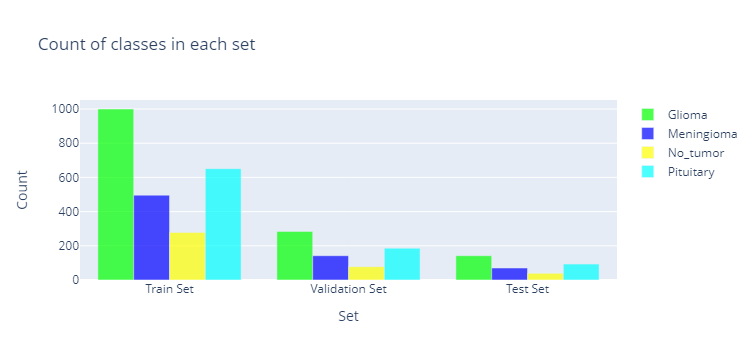

In [17]:
print(y_train)
y = dict()
y[0] = []
y[1] = []
y[2] = []
y[3] = []

for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))
    y[2].append(np.sum(set_name == 2))
    y[3].append(np.sum(set_name == 3))
    
print(y[0])  #new changes
print(y[1])
print(y[2])
print(y[3])

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='Glioma',
    marker=dict(color='#00FF00'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Meningioma',
    marker=dict(color='#0000FF'),
    opacity=0.7
)
trace2 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[2],
    name='No_tumor',
    marker=dict(color='#FFFF00'),
    opacity=0.7
)
trace3 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[3],
    name='Pituitary',
    marker=dict(color='#00FFFF'),
    opacity=0.7
)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

In [18]:
# Displays selected number of images 

def plot_samples(X, y, labels_dict, n=50):

    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()

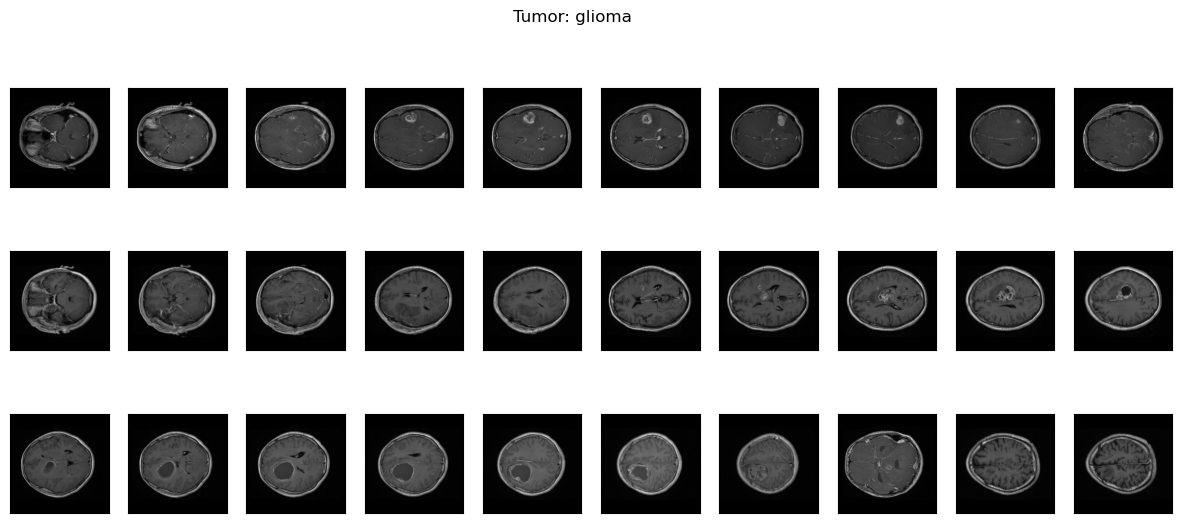

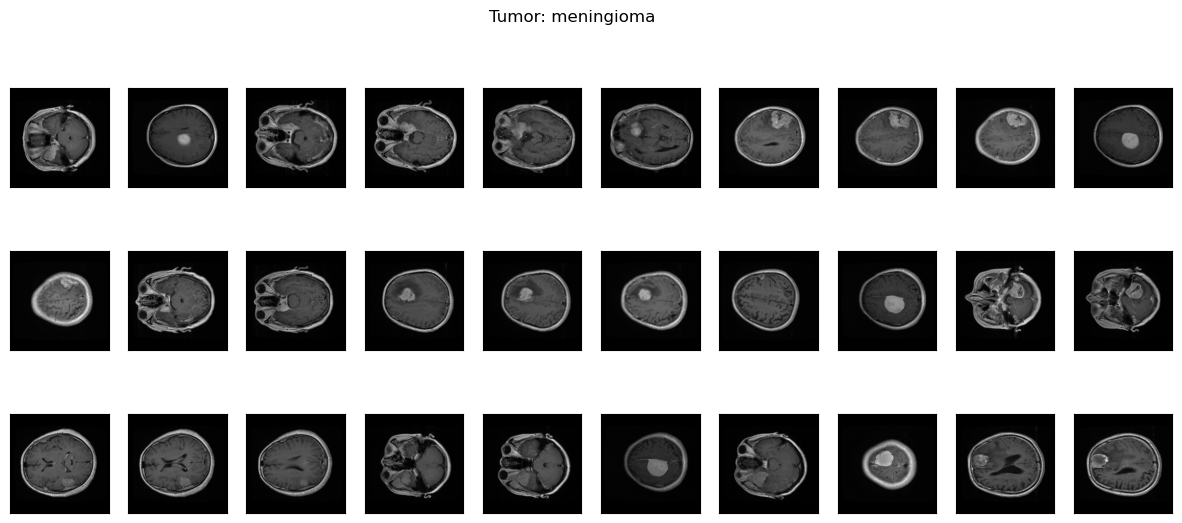

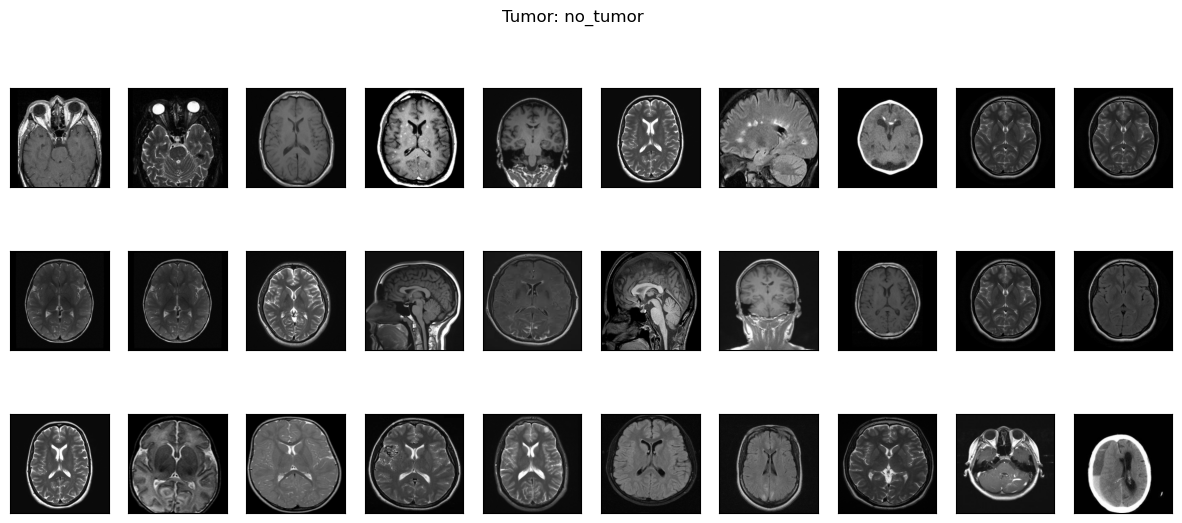

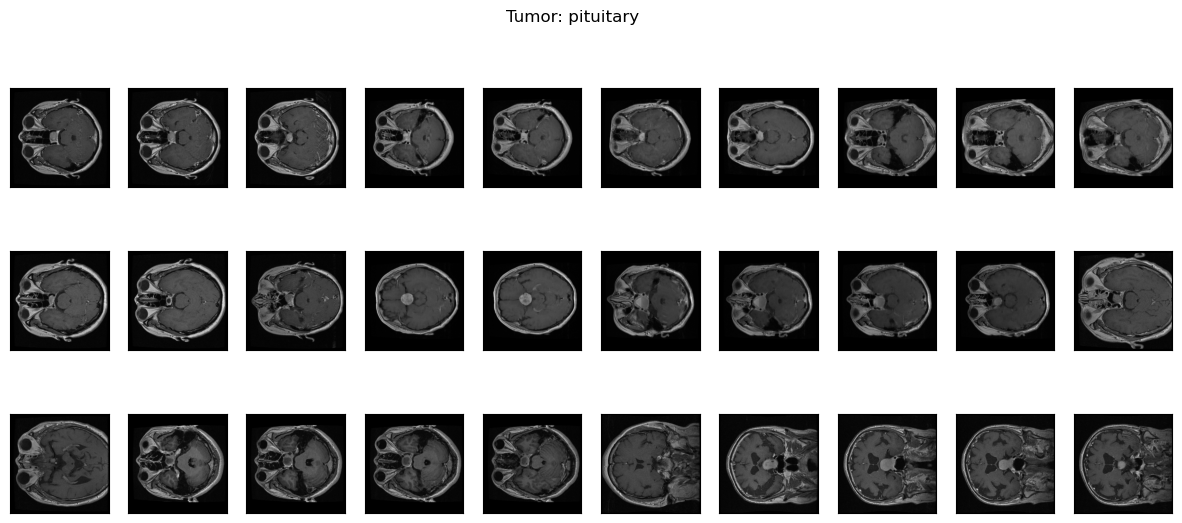

In [19]:
plot_samples(X_train, y_train, labels, 30)

In [20]:
def crop_imgs(set_name, add_pixels_value=0, target_size=(224, 224)):
    set_new = []  # List to store the cropped images

    for img in set_name:
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Apply Gaussian Blur to the grayscale image to reduce noise
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # Apply a binary threshold to the image
        # Pixels below 45 are set to 0 (black), and those above to 255 (white)
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]

        # Erode and dilate the thresholded image to remove small regions of noise
       

        # Find contours in the thresholded image
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)

        # Grab the largest contour found (this should correspond to the main object)
        c = max(cnts, key=cv2.contourArea)

        # Find the extreme points of the contour
        extLeft = tuple(c[c[:, :, 0].argmin()][0])  # Leftmost point
        extRight = tuple(c[c[:, :, 0].argmax()][0]) # Rightmost point
        extTop = tuple(c[c[:, :, 1].argmin()][0])   # Topmost point
        extBot = tuple(c[c[:, :, 1].argmax()][0])   # Bottommost point

        # Optionally add some pixels around the extreme points
        ADD_PIXELS = add_pixels_value

        # Crop the image using the extreme points (with added pixels if specified)
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS,
                      extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

        # Resize the cropped image to the target size (e.g., 224x224)
        new_img = cv2.resize(new_img, target_size)

        # Append the resized, cropped image to the list
        set_new.append(new_img)

    # Convert the list of images to a NumPy array
    return np.array(set_new)




In [21]:
# Apply cropping and resizing to each dataset
X_train_crop = crop_imgs(set_name=X_train, target_size=IMG_SIZE)
X_val_crop = crop_imgs(set_name=X_val, target_size=IMG_SIZE)
X_test_crop = crop_imgs(set_name=X_test, target_size=IMG_SIZE)

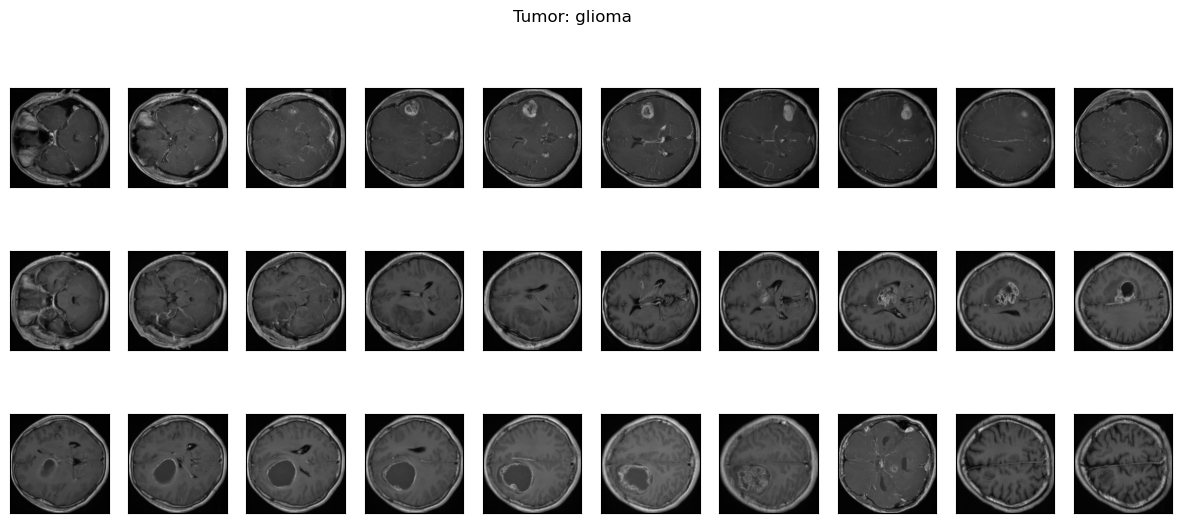

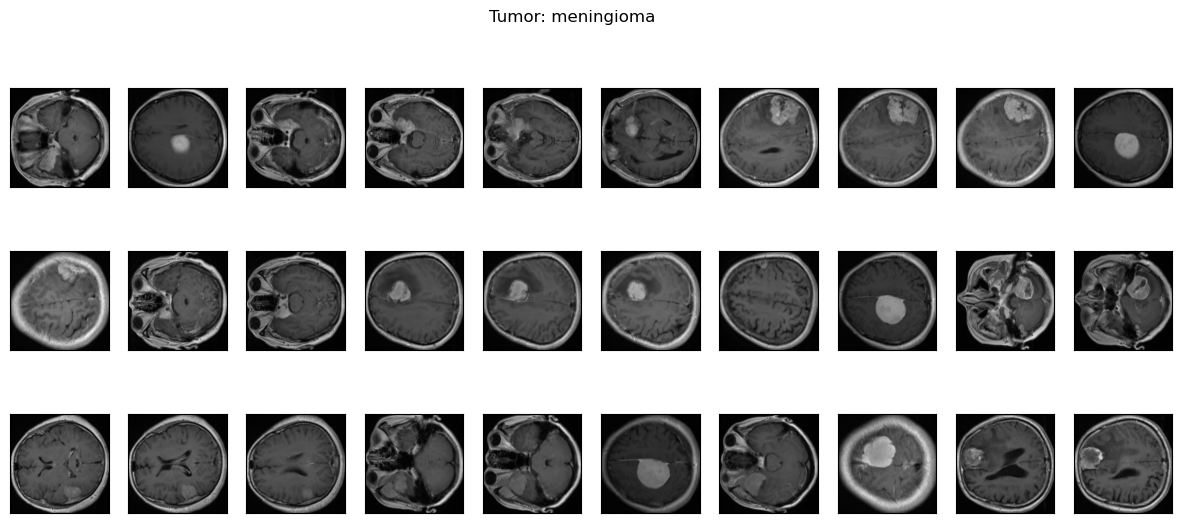

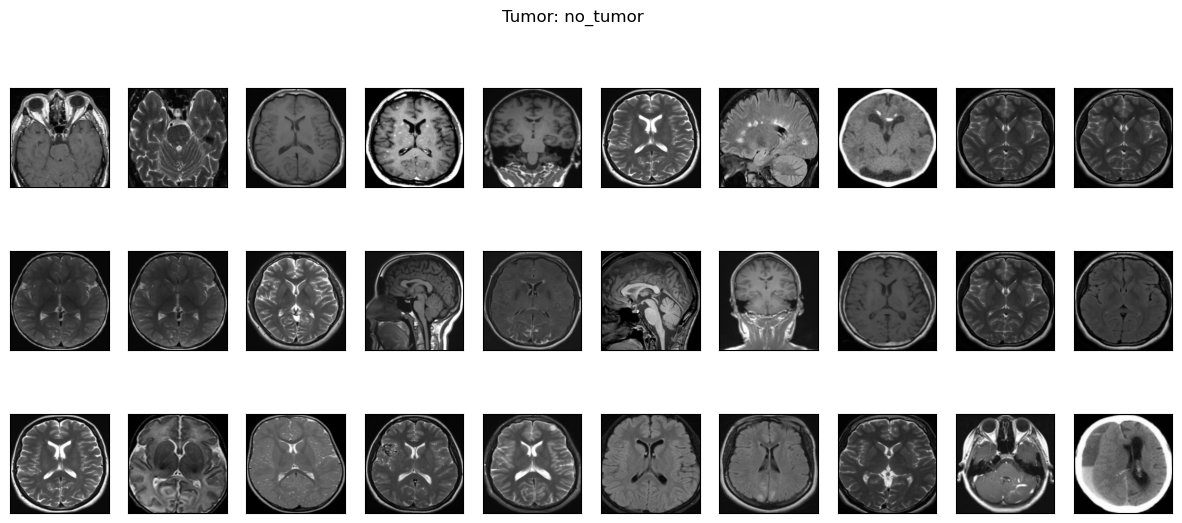

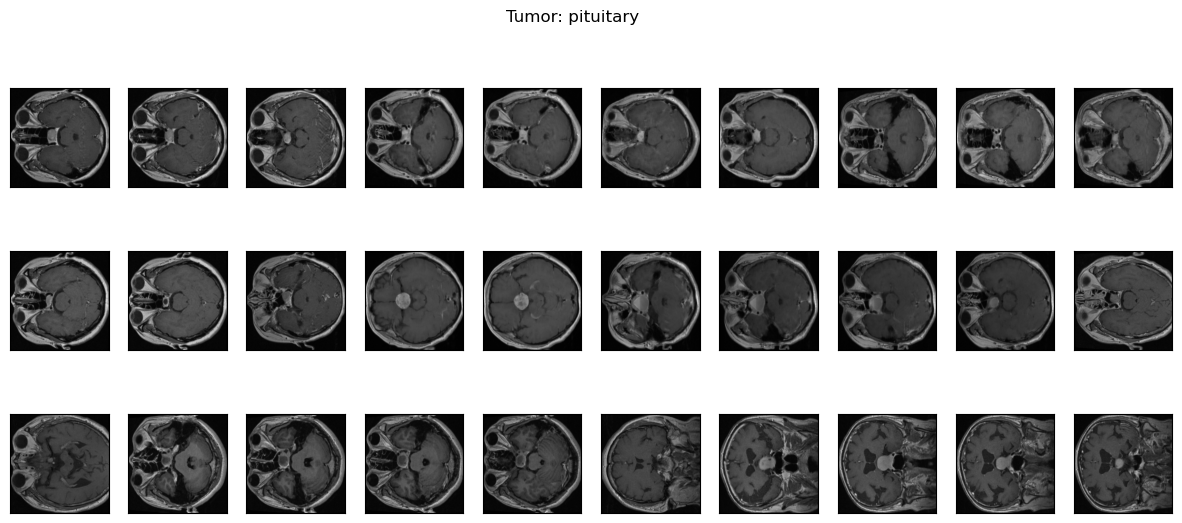

In [22]:
plot_samples(X_train_crop, y_train, labels, 30)

In [23]:
# Function to save all cropped images

def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'GLIOMA/'+str(i)+'.jpg', img)
        elif imclass == 1:
            cv2.imwrite(folder_name+'MENINGIOMA/'+str(i)+'.jpg', img)
        elif imclass == 2:
            cv2.imwrite(folder_name+'NO_TUMOR/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'PITUITARY/'+str(i)+'.jpg', img)
        i += 1

In [24]:
# Create directories for training crop
os.makedirs("TRAIN_CROP/GLIOMA", exist_ok=True)
os.makedirs("TRAIN_CROP/MENINGIOMA", exist_ok=True)
os.makedirs("TRAIN_CROP/NO_TUMOR", exist_ok=True)
os.makedirs("TRAIN_CROP/PITUITARY", exist_ok=True)

# Create directories for validation crop
os.makedirs("VAL_CROP/GLIOMA", exist_ok=True)
os.makedirs("VAL_CROP/MENINGIOMA", exist_ok=True)
os.makedirs("VAL_CROP/NO_TUMOR", exist_ok=True)
os.makedirs("VAL_CROP/PITUITARY", exist_ok=True)

# Create directories for testing crop
os.makedirs("TEST_CROP/GLIOMA", exist_ok=True)
os.makedirs("TEST_CROP/MENINGIOMA", exist_ok=True)
os.makedirs("TEST_CROP/NO_TUMOR", exist_ok=True)
os.makedirs("TEST_CROP/PITUITARY", exist_ok=True)

In [25]:
save_new_images(X_train_crop, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_val_crop, y_val, folder_name='VAL_CROP/')
save_new_images(X_test_crop, y_test, folder_name='TEST_CROP/')

In [26]:
#This function prepares the image for vgg-16
def preprocess_imgs(set_name, img_size):
  
    set_new = []
    for img in set_name:   
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )   
        set_new.append(preprocess_input(img))
    print(img.shape)   # Printing the size of the pre-processed images
    return np.array(set_new)

In [27]:
X_train_prep = preprocess_imgs(set_name=X_train_crop, img_size=IMG_SIZE)
X_test_prep = preprocess_imgs(set_name=X_test_crop, img_size=IMG_SIZE)
X_val_prep = preprocess_imgs(set_name=X_val_crop, img_size=IMG_SIZE)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

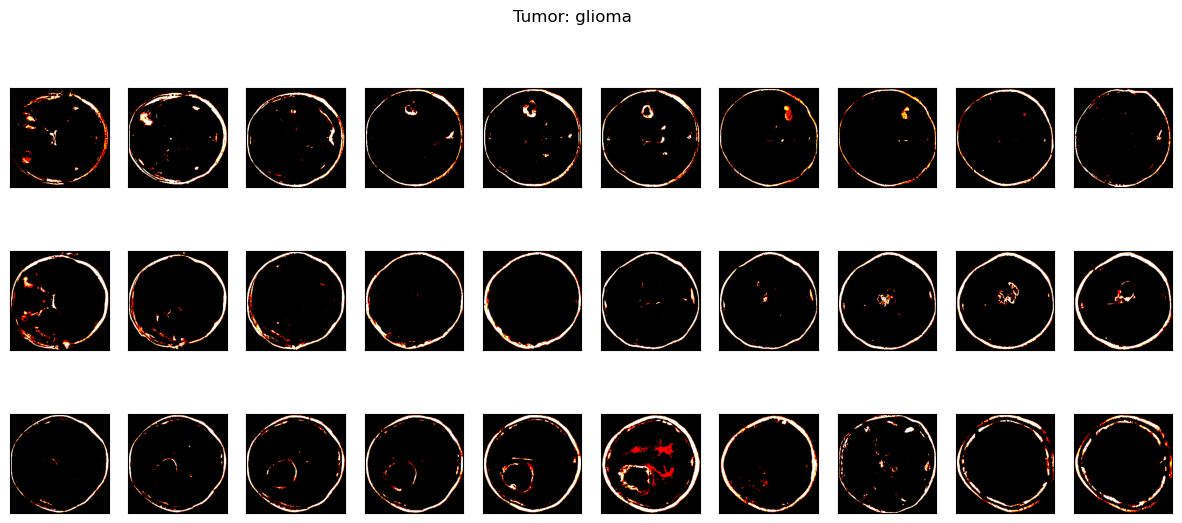

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

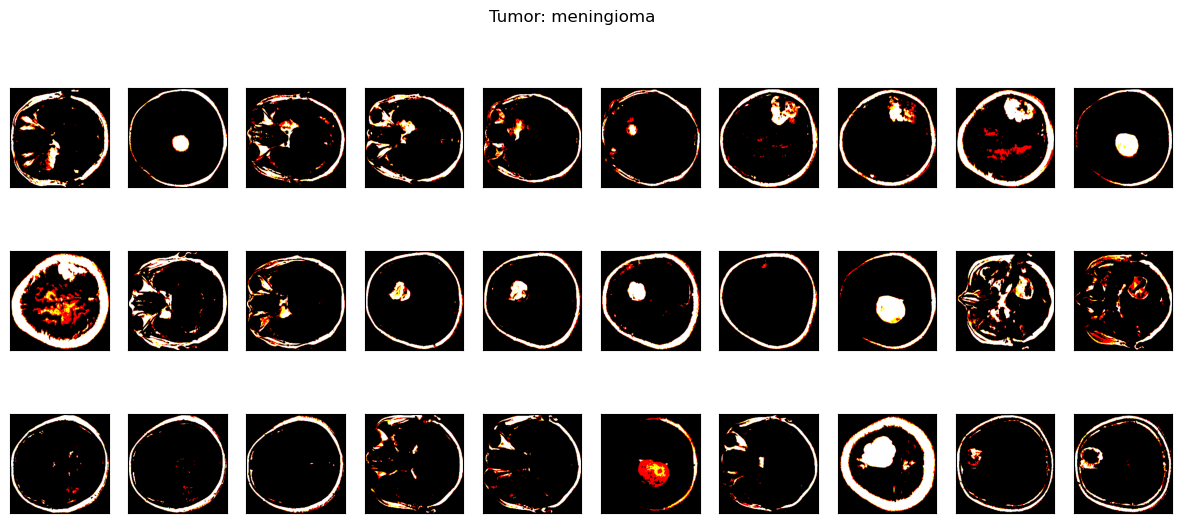

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

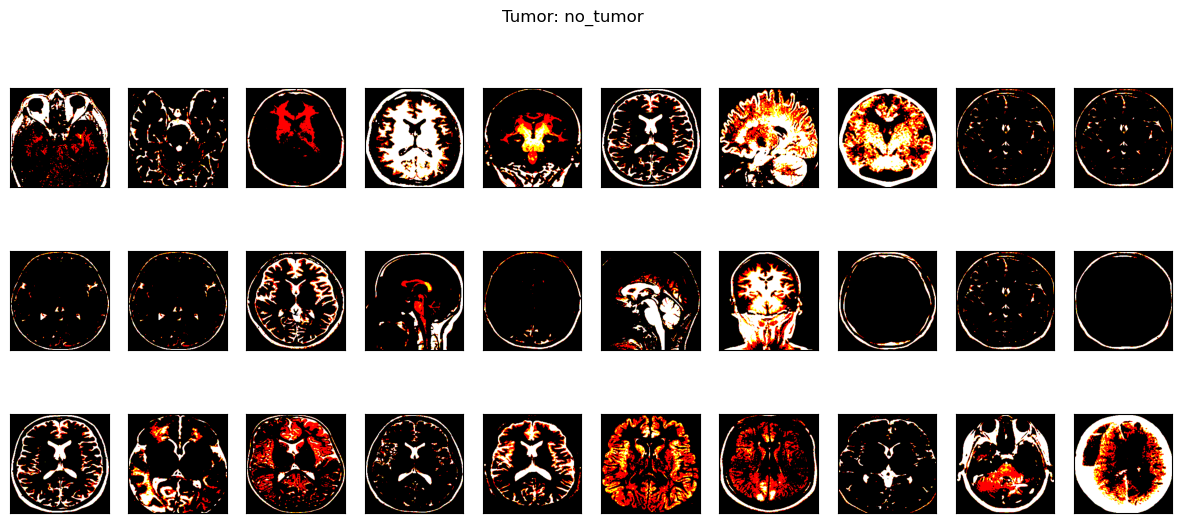

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

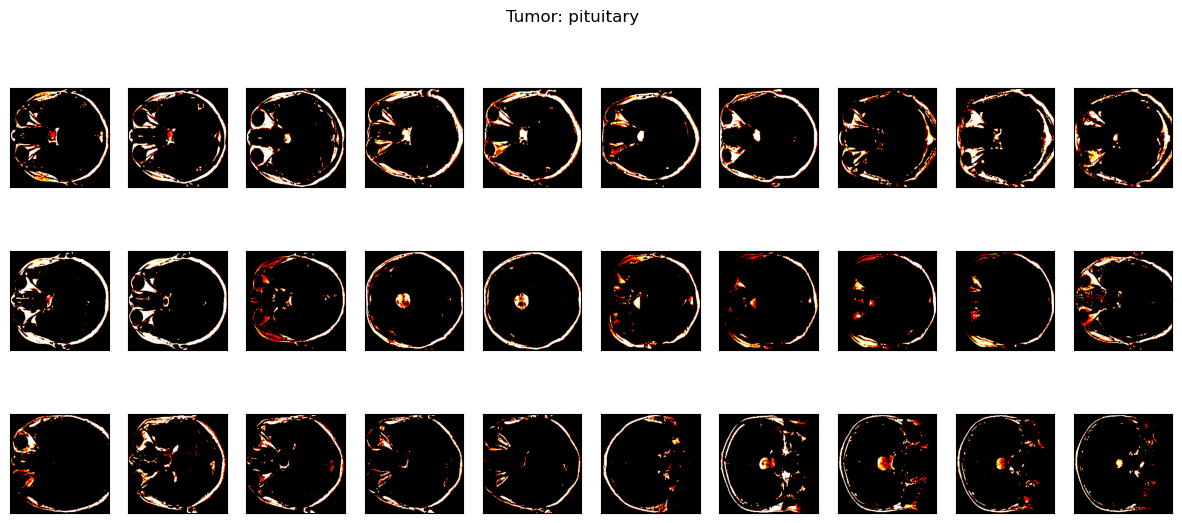

In [28]:
plot_samples(X_train_prep, y_train, labels, 30)

In [29]:
TRAIN_DIR = 'TRAIN_CROP/'
VAL_DIR = 'VAL_CROP/'

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    seed=RANDOM_SEED
)


validation_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='binary',
    seed=RANDOM_SEED
)

Found 2425 images belonging to 4 classes.
Found 690 images belonging to 4 classes.


In [43]:
from keras.callbacks import Callback
ACCURACY_THRESHOLD = 0.99
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') is not None and logs.get('acc') >= ACCURACY_THRESHOLD):
            print(ACCURACY_THRESHOLD*100)
            self.model.stop_training = True

In [31]:
from keras.callbacks import ReduceLROnPlateau

 # Callback Functions
callbacks = myCallback()
early_stop=EarlyStopping(patience=3)
reduceLR=ReduceLROnPlateau(patience=2)

In [32]:
from keras.layers import MaxPooling2D,Conv2D,Dense,BatchNormalization,Dropout,GlobalAveragePooling2D,Flatten,Input
import keras as k

def decay(epoch):
    return 0.001 / (1 + 1 * 30)


new_callbacks = []
new_callbacks += [k.callbacks.LearningRateScheduler(decay, verbose=1)]


vgg_model = VGG16(weights='imagenet',include_top=False ,input_shape=(224,224,3))
for layers in vgg_model.layers[:15]:    
    layers.trainable=False
x=vgg_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output=Dense(4,activation='softmax')(x)
model2=Model(inputs=vgg_model.input,outputs=output)
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [33]:
# To find which layers are trainable 
for i,layer in enumerate(vgg_model.layers):
    print(i,layer.name , layer.trainable)

0 input_layer False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [34]:
model2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,6

 Total params: 15,109,700 (57.64 MB)

 Trainable params: 7,474,436 (28.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [35]:
r2=model2.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=25,
    callbacks=new_callbacks,
    verbose=1
)


Epoch 1: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 1/40


C:\Users\vkvic\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



76/76 ━━━━━━━━━━━━━━━━━━━━ 606s 8s/step - accuracy: 0.4409 - loss: 1.4651 - val_accuracy: 0.8050 - val_loss: 0.4970 - learning_rate: 3.2258e-05

Epoch 2: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 2/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.7923 - loss: 0.5773 - val_accuracy: 0.8069 - val_loss: 0.4130 - learning_rate: 3.2258e-05

Epoch 3: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 3/40


C:\Users\vkvic\anaconda3\Lib\contextlib.py:158: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



76/76 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.8044 - loss: 0.4655 - val_accuracy: 0.8950 - val_loss: 0.2642 - learning_rate: 3.2258e-05

Epoch 4: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 4/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.8776 - loss: 0.3501 - val_accuracy: 0.9345 - val_loss: 0.1773 - learning_rate: 3.2258e-05

Epoch 5: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 5/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8876 - loss: 0.2865 - val_accuracy: 0.8950 - val_loss: 0.2876 - learning_rate: 3.2258e-05

Epoch 6: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 6/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9092 - loss: 0.2615 - val_accuracy: 0.9034 - val_loss: 0.2544 - learning_rate: 3.2258e-05

Epoch 7: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 7/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.92

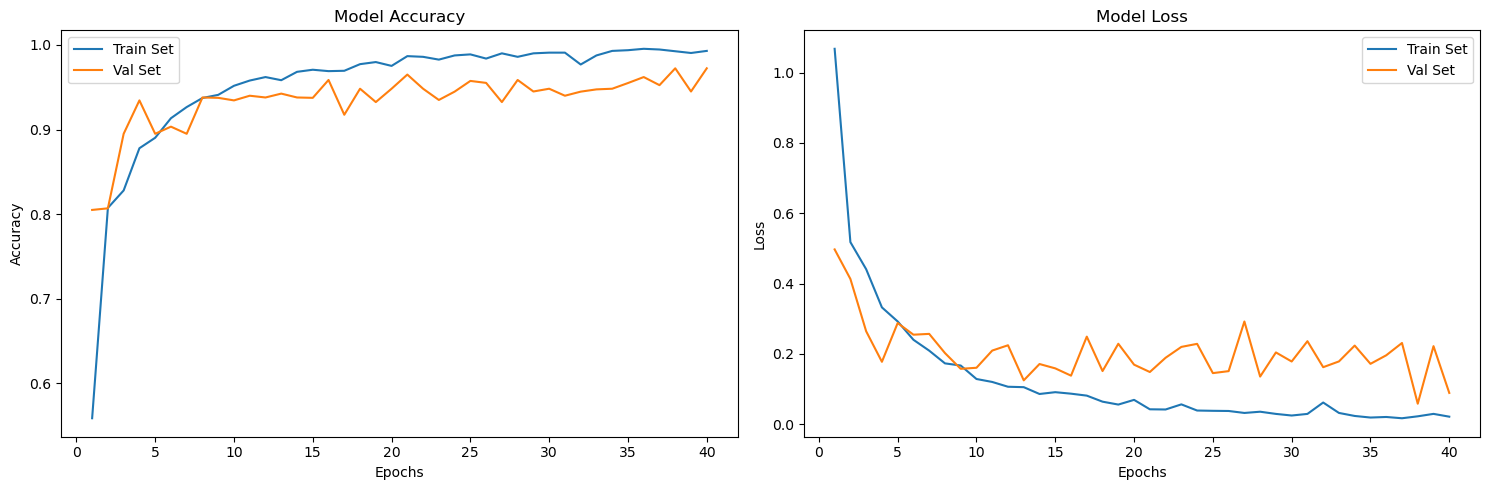

In [36]:
# plot model performance
acc = r2.history['accuracy']
val_acc = r2.history['val_accuracy']
loss = r2.history['loss']
val_loss = r2.history['val_loss']
epochs_range = range(1, len(r2.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [37]:
from sklearn.metrics import classification_report

test_pred_transfer=np.argmax(model2.predict(X_val_prep),axis=1)
print(classification_report(y_val,test_pred_transfer))

22/22 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       284
           1       0.89      0.93      0.91       142
           2       1.00      1.00      1.00        78
           3       0.96      0.97      0.97       186

    accuracy                           0.96       690
   macro avg       0.96      0.97      0.96       690
weighted avg       0.96      0.96      0.96       690



In [38]:
test_pred_transfer=np.argmax(model2.predict(X_test_prep),axis=1)
print(classification_report(y_test,test_pred_transfer))

11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       142
           1       0.88      0.97      0.93        70
           2       1.00      0.97      0.99        39
           3       0.98      0.95      0.96        93

    accuracy                           0.97       344
   macro avg       0.96      0.97      0.96       344
weighted avg       0.97      0.97      0.97       344



In [39]:
def inverse_classes(num):
    if num==0:
        return 'Glioma Tumor'
    elif num==1:
        return 'Meningioma Tumor'
    elif num==2:
        return 'No Tumor'
    else:
        return 'Pituitary Tumor'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


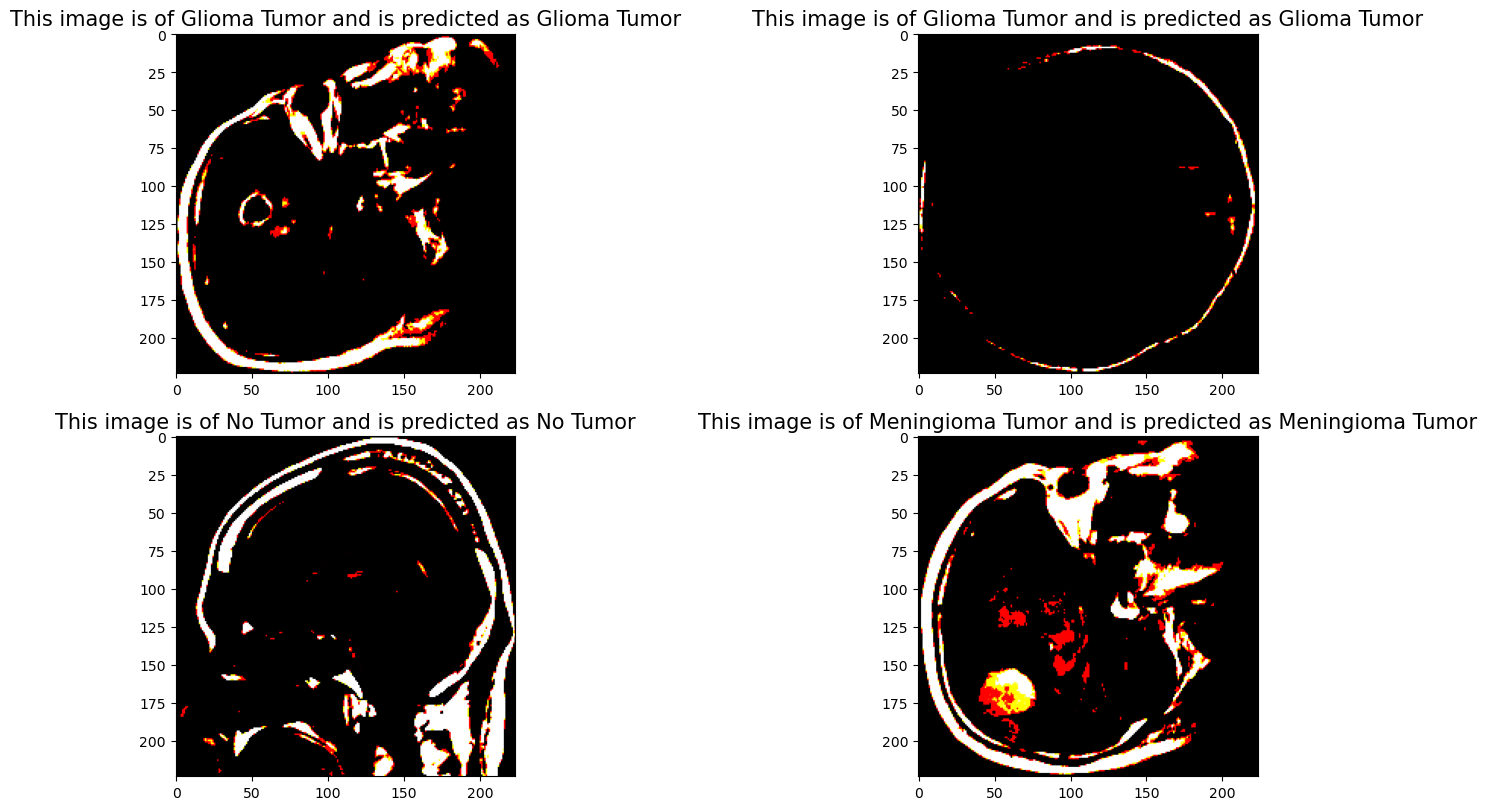

In [40]:
# Prediction using VGG16 model
plt.figure(figsize=(15,12))
for i in range(4):
    plt.subplot(3,2,(i%12)+1)
    index=np.random.randint(250)
    pred_class=inverse_classes(np.argmax(model2.predict(np.reshape(X_test_prep[index],(-1,224,224,3))),axis=1))
    plt.title('This image is of {0} and is predicted as {1}'.format(inverse_classes(y_test[index]),pred_class),fontdict={'size':15})
    plt.imshow(X_test_prep[index])
    plt.tight_layout()

In [41]:
model2.save("../vgg16_BT_detect_ver11.h5")